IZENA: Oier

ABIZENAK: Alvarez Parada


# Euler-en metodoa ED arrunten sistemetarako. 

## Grabitatearen eta airearen erresistentziaren eraginpean mugitzen ari den penduluaren simulazioa

Praktika honen egitura honakoa da:

<ul id="top">
<li><a href="#1---Penduluaren eredu matematikoa"> 
    1 - Penduluaren-eredu-matematikoa</a></li>
<li><a href="#2---Euler-en-metodoaren-aplikazioa">
    2 - Euler-en metodoaren aplikazioa</a></li>
<li><a href="#3---Euler-en-metodoa-gero-eta-urrats-luzera-txikiagoarekin">
    3 - Euler-en metodoa gero eta urrats luzera txikiagoarekin</a></li>
<li><a href="#4---Euler-en-metodo-hobetuaren-aplikazioa">
    4 - Euler-en metodo hobetuaren aplikazioa</a></li>
</ul>  

Praktika hau egin ahal izateko honako paketeak erabiliko ditugu:

In [1]:
using Plots

<a href="#top">Hasierara</a>


### 1 - Penduluaren eredu matematikoa

Pendulu baten mugimenduaren eredu matematiko batekin egingo dugu lan.  Penduluaren masa guztia bere muturrean duen esferan konzentratuta dagoela suposatuko dugu. Grabitateaz gain, airearen  erresistentzia ere hartuko dugu kontuan. 

Gure eredu matematikoan,  $\theta$ orientazio bertikalarekiko penduluaren angelua izango da, eta $\omega$ penduluaren abiadura angeluarra. 
Biraketa ardatza eta esferaren erdigunearko distantzia $L$ izango da, $R$ esferaren radioa, eta $g$ grabitatearen azelerazioa. Bestalde, $\rho_e$ esferaren masa dentsitatea izango da,  $\rho_a$ airearen dentsitatea, eta  $\mu$  airearen biskositate dinamikoa. Lehen ordenako honako ekuazio diferentzialen sistema erabiliko dugu:
   \begin{equation*}
   \frac{d \theta}{dt} = \omega, \quad
        \frac{d \omega}{dt} = -\frac{g}{L}\, \sin(\theta) -  \frac{3 \rho_a\, L\, C_D(Re)}{8\, \rho_e \, R}\, |\omega|\, \omega, \hspace{3em} \tag{1}
    \end{equation*}
non 
\begin{equation*}
        Re = \frac{2\, \rho_a\, R\, L}{\mu} |\omega|, \quad
        C_D(Re)  = \left\{
        \begin{matrix}
       \frac{24}{Re} + \frac{2}{5} +\frac{6}{1+\sqrt{Re}} & \mbox{ baldin} & Re>0,\\
       0  \phantom{ \frac{2}{5} +\frac{6}{1+\sqrt{Re}} }  & \mbox{ baldin} & Re=0.
        \end{matrix}
        \right. 
\end{equation*}


Problemaren parametro konstanteen balioak ondorengoak dira:
\begin{equation}
\begin{split}
L&=0.2\, \mathrm{m}, \quad R=0.02\, \mathrm{m}, \quad
\rho_e=2712\, \mathrm{Kg}/\mathrm{m^3}, \\
\rho_a &= 1.205\,  kg/m^3, \quad \mu = 1.789\times 10^{-5}\,  kg/(\mathrm{m} \,\mathrm{seg}), \quad  g=9.8\, \mathrm{m}/\mathrm{seg}^2. 
\end{split}
\tag{2}
\end{equation}
Airearen dentsitate eta biskositate dinamikoaren balioak itsasoaren mailako aireari dagokie hurrenez hurren, eta esferaren dentsitatea aldiz, aluminiozko esfera trinko bati dagokio.

Penduluaren mugimendua nahi dugu simulatu (hau da, $\theta$ angeluaren eta $\omega$ abiadura angeluarraren eboluzioa) denbora tarte jakin batean.  Konkretuki, $t \in [0,T]$ tarterako, non $T=50\, \mathrm{seg}$ den. Hasierako unean ($t=0$ unean) pendulua goian ia bertikalki eta geldirik utzi dugula suposatuko dugu:
 \begin{equation*}
   \theta(0)=\pi-0.001, \quad \omega(0)=0. \tag{3}
 \end{equation*}
 Hasierako baldintza hauek eta (1) sistemak erabat determinatzen diuzte $\theta(t)$ eta $\omega(t)$ funtzioak.

Jakina da (1) sistema modu trinkoan
\begin{equation}
\frac{d}{dt} u = f(t,u,p). \tag{4}
\end{equation}
formatuan idatz daitekeela, non $u$ egoera aldagaien bektorea den.

#### 1.1 Zein dira sistemaren egoera aldagaiak? Zein dira problemaren parametro konstanteen $p$ bektorearen osagaiak? Sistema autonomoa al da?
  > - Egoera aldagaiak: theta, omega
  > 
  > - Parametro konstanteak: L, R, rho, mu, g,
 >
 > - Sistema autonomoa? Bai

#### 1.2 Julia-n inplementatu  (1) sistema (4) formatuan idazteko balio duen $f$ funtzioa (sarrera argumentu gisa $t$ zenbakia, egoera aldagaien $u$ bektorea, eta parametro konstanteen $p$ bektorea dituena, eta irteera argumentu gisa bi osagaiko $du$ bektorea bueltatzen duena)

In [12]:
function f(t,u,p)
    L = p[1]
    R = p[2]
    rhoe = p[3]
    rhoa = p[4]
    mu = p[5]
    g = p[6]
    theta = u[1]
    omega = u[2]
    Re = 2*rhoa*R*L*abs(omega)/mu
    if iszero(Re) 
        CD = 0.
    else
        CD = 24/Re + 0.4 + 6/(1+sqrt(Re))
    end 
    dtheta = omega
    domega = -g/L * sin(theta)-(3*rhoa*L*CD/(8*rhoe*R))
    du = [dtheta,domega] 
    return du
end

f (generic function with 1 method)

 #### 1.3 Goiko f funtzioa ondo inplementatuta dagoela egiaztatzeko, $f(0, [\pi, 10], p)$ balioztatu,  $p=(L, R, \rho_e, \rho_a, \mu, g)$ parametro konstanteen (2) baliotarako

In [3]:
L = 0.2
R = 0.02
rhoe = 2712
rhoa = 1.205
mu = 1.789e-5
g=9.8
p = [L,R,rhoe,rhoa,mu,g]
f(0., [pi,10.], p)

2-element Vector{Float64}:
 10.0
 -0.000808263535103653

 > **Konprobazioa:** [10.0, -0.0808264] bektorea bueltatu beharko liguke

 
 
 Demagun hasieran, $t=0$ unean, penduluaren egoera $u(0)=(\theta(0), \omega(0))=(\pi-0.001, 0)$ dela, eta $t=1/480$ uneko egoera zein izango den kalkulatu nahi dugula.
 
 #### 1.4 Kalkulatu Euler-en metodoaren ($h=1/480$ luzerako) urrats bat aplikatuz $u(h)=(\theta(h),\omega(h))$ egoera bektorearen $u_1=(\theta_1,\omega_1)$ hurbilpena

In [10]:
u0 = [pi-0.001, 0]
h = 1/480
t0 = 0
u1 = u0+h*f(t0,u0,p)

2-element Vector{Float64}:
  3.1405926535897932
 -0.00010208331631944655

 > **Konprobazioa:** $\theta_1 = 3.14059$, $\omega_1 = -0.000102083$

<a href="#top">Hasierara</a>

### 2 - Euler-en metodoaren aplikazioa

Ekuazio diferentzial arrunten (EDA) bidez zehaztutako sistemen eboluzioaren zenbakizko simulazioa egin ahal izateko Euler-en metodoa
inplementatuko dugu Julia lenguaian. Konkretuki, (2) formatura egokitzen
diren $d\geq 1$ dimentsioko sistemetarako aplikatu ahal izango dugu, non
egoera aldagaien bektorea $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ den, eta $p \in \mathbb{R}^m$ problemaren parametro konstanteen bektorea den.



Dakigunez, behin $p$ parametroen bektorea finkaturik, 
eta hasierako $t_0 \in \mathbb{R}$ denbora eta hasierako $u_0 \in \mathbb{R}^d$ egoera bektorea emanik, (2) sistemaren $u(t)$ soluzioen artean  bakarra esistitzen da
\begin{eqnarray}
  u(t_0)=u_0 \hspace{8em}
\end{eqnarray}
hasierako baldintzak betetzen dituena.


Demagun $u(t)$ soluzioaren eboluzioa aztertu nahi dugula $t \in [t_0,T]$ denbora tartean, eta  $[t_0,T]$ tartea $n$ azpitarte berdinetan banatuz lortzen dugun denbora diskretizaziorako nahai ditugula hurbildu $u(t)$ egoera bektorearen balioak. Hau da, denboraren $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$ balioak horrela kalkulatuko ditugu,  $t_k=t_{0}+k h$, non $h=(T-t_0)/n$ den, eta  $u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ hurbilpenak kalkulatuko ditugu $k=1,\ldots,n$ kasutarako.

Demagun funtzio bat definitu dugula (esate baterako,  $f$ izenekoa),
sarrera gisa $t \in \mathbb{R}$,  $u \in \mathbb{R}^d$ bektorea, 
eta parametroen $p\in \mathbb{R}^m$ bektorea hartzen dituena, eta irteera gisa 
$f(t,u,p) \in \mathbb{R}^d$ bektorea bueltatzen duena. Funtzio horrek,
 (2) moduko ekuazio diferentzial arrunten sistema bat zehazten du.

Euler-en metodoa inplementatzeko,  'Euler' funtzioa definituko dugu, 

- sarrera argumentu gisa $u_0 \in \mathbb{R}^d$, 
$t_0 \in \mathbb{R}$, $T \in \mathbb{R}$, $n \in \mathbb{N}$,  $p\in \mathbb{R}^m$, eta $f$ funtzioaren izena hartzen dituena,

- eta irteera gisa,  $(t_0,t_1,\ldots,t_n)$ bektorea eta $n+1$ lerro eta $d$ zutabe dituen taula bueltatzen duena

 \begin{equation}
 \left(
     \begin{array}{c}
     \fbox{$\qquad u_0\qquad $}\\
   \fbox{$\qquad u_1\qquad $} \\
      \vdots \\
    \fbox{$\qquad u_0\qquad $}
     \end{array}
\right),
\end{equation} 

non

\begin{equation}
u_0 = u(t_0), \quad u_1 \approx u(t_1), \quad u_2 \approx u(t_2), \ldots, \quad u_n \approx u(t_n),
\end{equation} 

eta

$$t_k = t_0 + k \, h, \quad h=(T-t_0)/n$$

diren.
Hemen, $u_k \in \mathbb{R}^d$ ($k=0,1\ldots,n$) bektoreak Euler-en metodoren bidez lortutako $u(t_k)$ balioen hurbilpenak dira ($u(t)$ funtzioa 
(2)--(3) hasierako baliodun problemaren soluzioa delarik). 

- Hautazko sarrera argumentu gisa, $m$ zenbaki arrunta eman daiteke. Sarrera argumentu horrek defektuzko balioa $m=1$ izango du, eta kasu horretan ($m=1$ kasuan), $(t_{k-1},u_{k-1})$ egoeratik abiatuta $(t_k,u_k)$ kalkulatzeko  Euler-en metodoaren  $h=(T-t_0)/n$ luzerako urrats bat emango da. Aldiz, $m \geq 2$ balioarekin deitzen bazaio, $(t_{k-1},u_{k-1})$ egoeratik abiatuta $(t_k,u_k)$ kalkulatzeko  Euler-en metodoaren  $h=(T-t_0)/(n\, m)$) luzerako  $m$ urrats emango dira.

#### 2.1 Euler funtzioaren inplementazioa osotu

In [48]:
function Euler(u0, t0, T, n, p, f, m = 1)
    d = length(u0)
    uu = zeros(n+1,d)
    tt = zeros(n+1)
    uu[1,:] = u0
    tt[1] = t0
    tk = t0
    uk = u0
    h = (T-t0)/(n*m)
    for k in 1:n
        for j in 1:m
            uk = uk + h*f(tk,uk,p)
            tk = tk+h
        end
        tt[k+1] = tk
        uu[k+1,:] = uk
    end
    return tt, uu
end

Euler (generic function with 2 methods)

#### 2.2 Euler-en metodoaren inplementazio hori erabili,  $\theta(0)=\pi-0.001$ eta $\omega(0)=0$ hasierako baliotarako, (1) sistemaren $\theta(t)$ eta $\omega(t)$ balioak  lortzeko  
$t=0$, $t = 1/60$, $t = 2/60$, ..., $t=k/60$, ..., $t_{1500}=1500/60 = 25$ unetarako, Euler-metodoa $h=25/12000=1/480$ urrats luzerarekin aplikatuta. Problemaren parametro konstanteen (2) balioak erabili (itsas mailan dagoen mugitzen ari den aluminiozko pendulua)

In [49]:
T = 25
n = 1500
m = 8
denborak, uu = Euler(u0, t0, T, n, p, f, m)

([0.0, 0.016666666666666666, 0.03333333333333333, 0.049999999999999996, 0.06666666666666667, 0.08333333333333338, 0.1000000000000001, 0.11666666666666682, 0.13333333333333347, 0.15000000000000008  …  24.850000000006293, 24.866666666672973, 24.883333333339653, 24.900000000006333, 24.916666666673013, 24.933333333339693, 24.950000000006373, 24.966666666673053, 24.983333333339733, 25.000000000006413], [3.1405926535897932 0.0; 3.1405647076802308 -0.002851456407950953; … ; -259.5188640837758 -13.39714736237185; -259.7366548327672 -12.657579072550725])

#### 2.3 Emaitza horiek erabili penduluaren mugimenduaren simulazioa egiteko 

In [50]:
angeluak = uu[:,1];

xx = L*sin.(angeluak)
yy = -L*cos.(angeluak);

axis_lim = L*1.2;


anim = Animation()

for i =1:(n+1)
    str = string("Time = ", round(denborak[i]), " sec");
    plot([0,xx[i]], [0,yy[i]],size=(400,300),
           xlim=(-axis_lim,axis_lim),ylim=(-axis_lim,axis_lim), aspect_ratio=1,
           markersize = 10, markershape = :circle,label ="",axis = []);    
    frame(anim)
end

┌ Info: Saved animation to /tmp/jl_uRwL0rSJAd.gif
└ @ Plots /home/oier/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/tmp/jl_uRwL0rSJAd.gif")
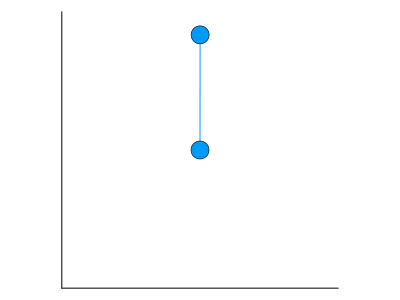

In [45]:
gif(anim,fps = 60)

#### 2.4  Mugimendua errealista al da?

 >Ez, pendualua berez, une batean gelditu beharko litzake

<a href="#top">Hasierara</a>


### 3 - Euler-en metodoa gero eta urrats luzera txikiagoarekin

Angeluaren eboluziorako lortutako emaitzak fidagarriak diren ala ez begiratzeko, Euler-en metodoa urrats luzera txikiagorako aplikatuko dugu.


#### 3.2 Goian lortutako  $t \in [0,25]$ tarteko angeluen eboluzioaren emaitzak fidagarriak diren ala ez konprobatzeko, irudi berean bi grafiko marraztu, alde batetik Euler-en metodoa $h=1/480$ urrats luzerarekin aplikatuz lortutako angeluen grafikoa, eta bestalde Euler-en metodoa $h=1/960$ urrats luzerarekin aplikatuz lortutako angeluena.  Bi kasuetan, Euler-en metodoaren goiko inplementazioa erabiliko dugu, emaitzak $t_0=0,\ t_1 = 1/60,\ t_2 = 2/60,\ \ldots,t_k = k/60,\ldots t_{1500}=1500/60= 25$ unetarako lortzeko.

In [51]:
denborak, angeluak = Euler(u0, t0, T, n, p, f, m)

m = 16
denborak, angeluak2 = Euler(u0, t0, T, n, p, f , m)

([0.0, 0.016666666666666666, 0.03333333333333333, 0.05000000000000005, 0.06666666666666674, 0.08333333333333334, 0.09999999999999995, 0.11666666666666656, 0.13333333333333316, 0.14999999999999977  …  24.84999999999794, 24.866666666664592, 24.883333333331244, 24.899999999997895, 24.916666666664547, 24.9333333333312, 24.94999999999785, 24.9666666666645, 24.983333333331153, 24.999999999997804], [3.1405926535897932 0.0; 3.1405597512710197 -0.0029246582830106792; … ; -216.31828829279567 -7.990896857558068; -216.44890981824932 -7.680687221431785])

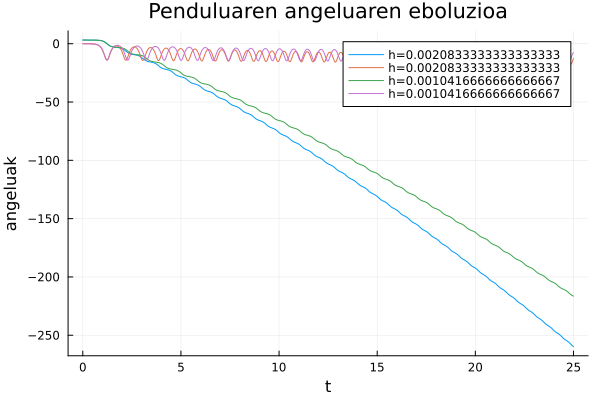

In [52]:
plot(denborak,angeluak, title="Penduluaren angeluaren eboluzioa",
                         xlabel="t", ylabel="angeluak", label="h=$h")
plot!(denborak,angeluak2, label="h=$(h/2)")

#### 3.3 Desberdintasun nabarmenik ba al da angeluen eboluzioaren bi grafikoen artean?
> 
> Desberdinatasun nabaria dago bien artean

#### 3.4 Aurreko galderaren erantzuna baiezkoa baldin bada, gero eta emaitza doiagoak kalkulatzen joan, $h$ luzera urratsa behin eta berriz erdibiduz (hau da, $m$-ren balioa bikoiztuz), azken bi emaitza doienen grafikoak irudi berean marraztuz, bi grafikoak bista batez ia bereizten ez diren arte

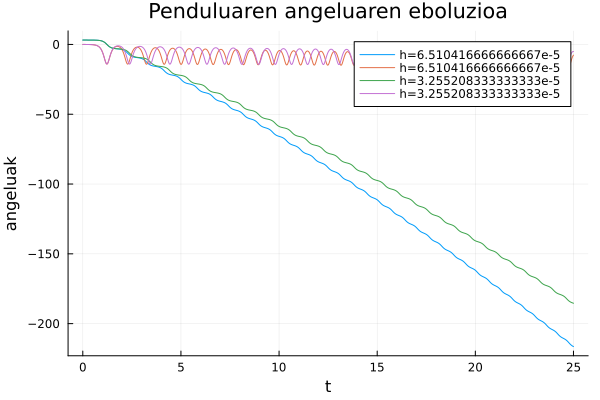

In [53]:
angeluak = angeluak2 
m = 32
_, angeluak2 = Euler(u0, t0, T, n, p, f, m)

plot(denborak,angeluak, title="Penduluaren angeluaren eboluzioa", 
                         xlabel="t", ylabel="angeluak", label="h=$(h/m)")
plot!(denborak,angeluak2, label="h=$(h/(2m))")

#### 3.5 Lortutako emaitza doienetarako, penduluaren simulazioa burutu

In [54]:
xx = L*sin.(angeluak2)
yy = -L*cos.(angeluak2);

axis_lim = L*1.2;


anim = Animation()

for i =1:(n+1)
    str = string("Time = ", round(denborak[i]), " sec");
    plot([0,xx[i]], [0,yy[i]],size=(400,300),
           xlim=(-axis_lim,axis_lim),ylim=(-axis_lim,axis_lim), aspect_ratio=1,
           markersize = 10, markershape = :circle,label ="",axis = []);    
    frame(anim)
end

┌ Info: Saved animation to /tmp/jl_2bsHIZKVyZ.gif
└ @ Plots /home/oier/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/tmp/jl_2bsHIZKVyZ.gif")
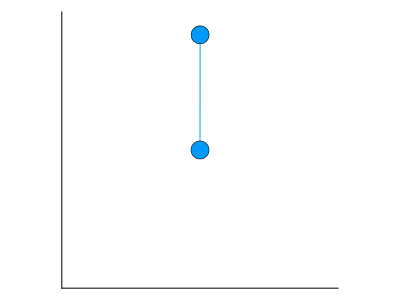

In [55]:
gif(anim,fps = 60)

#### 3.6 Oraingoan mugimendua errealistagoa al da?
> Bai, nahiz eta pendulua ez gelditu, orain, behintzat ez ditu buelta osoak ematen edota gero eta azkarrago joaten

#### 3.7 Azken bi exekuzioetan lortutako angeluen diferentziaren grafikoa irudikatu (angeluen diferentziak denborarekiko)
Diferentzia horiek, emaitzen errorearen tamainiaren ideia bat emateko balio digute. 

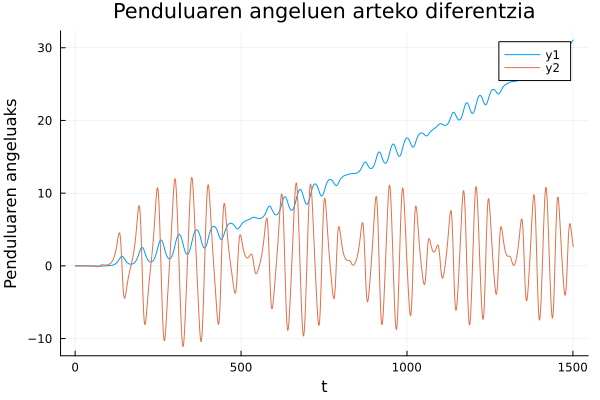

In [62]:
 dif = (angeluak2 - angeluak)
 plot(dif, title = "Penduluaren angeluen arteko diferentzia", xlabel = "t", ylabel = "Penduluaren angeluaks")

#### 3.8 Angeluen eboluziorako lortutako emaitzen doitasuna haundia dela iruditzen al zaizu?
> ??

<a href="#top">Hasierara</a>


### 4 - Euler-en metodo hobetuaren aplikazioa

#### 4.1 - Euler-en metodo hobetuari dagokion funtzio bat definitu, Euler funtzioaren sarrera eta irteera argumentu berberak dituena.

In [ ]:
function EulerHobetua(u0, t0, T, n, p, f, m = 1)
    d = length(u0)
    uu = zeros(n+1,d)
    tt = zeros(n+1)
    uu[1,:] = u0
    tt[1] = t0
    tk = t0
    uk = u0
    h = (T-t0)/(n*m)
    for k in 1:n
        for j in 1:m
            _uk = uk + h*f(t,uk,p)
            uk = uk + h*f()
            tk = t+h
        end
        tt[k+1] = tk
        uu[k+1,:] = uk
    end
    return tt, uu
end

#### 4.2 Hirugarren ataleko eginkizunak errepikatu, baina oraingoan Euler-en metodo hobetua erabiliz.

**Oharra: Euler-en metodo hobetua ondo inplementatuta baldin badago, askoz urrats luzera txikiagoarekin lortuko dira emaitza fidagarriak.**

<a href="#top">Hasierara</a>